# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# create the data frame 

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

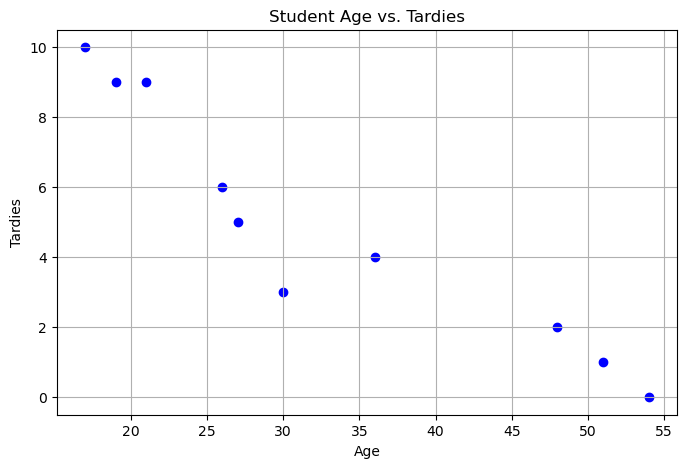

In [3]:
# Scatter plot visualization 
plt.figure(figsize=(8,5))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue')
plt.title('Student Age vs. Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.grid(True)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

#### there is a clear trend , as age decreases the number of tardies increases 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Calculate covariance
cov_matrix = student_data.cov()
cov_age_tardies = cov_matrix.loc['Age', 'Tardies']


In [5]:
# Calculate correlation
corr_matrix = student_data.corr()
corr_age_tardies = corr_matrix.loc['Age', 'Tardies']

In [6]:
print("Covariance between Age and Tardies:", cov_age_tardies)
print("Correlation between Age and Tardies:", corr_age_tardies)

Covariance between Age and Tardies: -45.56666666666666
Correlation between Age and Tardies: -0.9391626886887121


#### the covariance shows how 2 variables change together , since it's negative that confirms that the age and number od tardies goes in the opposite direction , if the age increases the tardies decreases and vice versa 

the correlation standardizes the covariance between -1 and 1 and it's very close  to -1 that confirms the opposit direction of the relationship between the age and number of tardies 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

#### we can build a linear regression model since we are working with continuous data the pattern of the data in the scatterplot also confirms that a linear regression is possible for this model 

#### the target variable would be number of tardies 

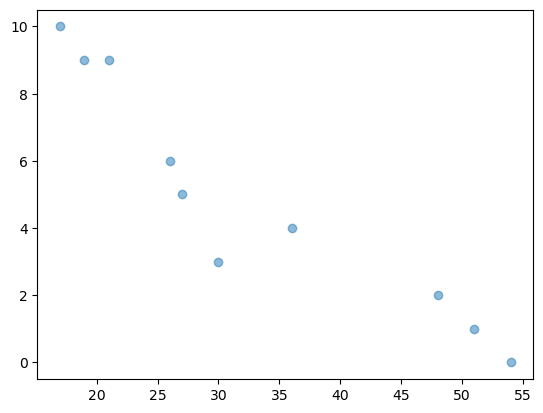

In [7]:
#we have to reshape the 
X = student_data.Age.values.reshape(-1, 1)
y = student_data.Tardies.values

plt.plot(X, y, "o", alpha=.5)

In [8]:
# split the data into train and test 

#!pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8,) (2,)


In [9]:
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coeficient and intercept of the regression
print(lm.intercept_, lm.coef_)


13.222083815286057 [-0.25402616]


Plot your regression model on your scatter plot.

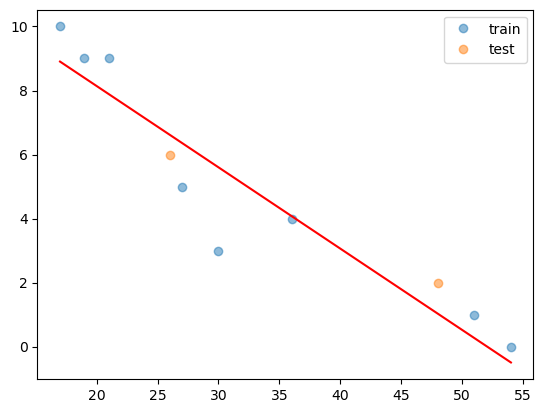

In [10]:
# Define xmin xmax for the model:
xmin, xmax = round(X.min()), round(X.max())

x_model = np.arange(xmin, xmax+1)
y_model=[lm.intercept_+lm.coef_*x for x in x_model] # np.arange returns evenly spaced values within a given interval.

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()
# The red line gives the predicted values of this model

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Build the regression model
model = smf.ols('Tardies ~ Age', data=student_data).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           5.57e-05
Time:                        09:44:59   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.0

In [12]:
# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Score:')
print(lm.score(X_train, y_train), lm.score(X_test, y_test))

# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
mse_test = np.mean((y_test_pred - y_test)**2)
print('MSE:')
print(mse_train, mse_test)

Score:
0.881220757825905 0.83445475027491
MSE:
1.5274268173325027 0.6621809989003599


*your explanation here*

tardies = intercept + coefficient* age , the coefficient is here negative that's why the line is decreasing , if the age increases the tardies decrease 


The R-squared value is 0,88 close to 1 tells that the Age is a strong predictor of the tardies and the model fits the data very well 


the p value is 0.025 < 0,05 we are statistically confident that age is related to tardies 

On average the suqared difference between the predections and the real values is 1. 5 which is the MSE




## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [14]:

vehicles = pd.read_csv(r"C:\Users\tlili\OneDrive\Bureau\Bootcamp\labs\lab-regression-analysis-en\vehicles.csv")

In [15]:
vehicles.head(3)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [16]:
#define the target and the features 
X_vehicles = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  # Select features (all columns except 'CO2 emission')
y_vehicles = vehicles['CO2 Emission Grams/Mile']  # Target variable 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vehicles, y_vehicles, test_size=0.2, random_state=42)


n_features = len(X_train.columns)  # Get number of features from training data (more reliable)

scores = []

for i in range(n_features):
    # Select feature by name (assuming column names are informative)
    feat_name = X_train.columns[i]  # Use training data for column names
    feat1_train = X_train[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature
    feat1_test = X_test[feat_name].to_numpy().reshape(-1, 1)  # Reshape for single feature

    # Train model
    regr_feat1 = LinearRegression()
    regr_feat1.fit(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable

    # Predict (assuming y_test is a Series)
    y_train_pred = regr_feat1.predict(feat1_train)
    y_test_pred = regr_feat1.predict(feat1_test)

    # Evaluate model (using mean squared error)
    train_score = regr_feat1.score(feat1_train, y_train.values.reshape(-1, 1))  # Reshape target variable
    test_score = regr_feat1.score(feat1_test, y_test.values.reshape(-1, 1))  # Reshape target variable
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    scores.append([feat_name, train_score, test_score, mse_train, mse_test])

# Print or analyze scores as needed
print(pd.DataFrame(scores, columns=["Feature", "Train Score", "Test Score", "Train MSE", "Test MSE"]))

             Feature  Train Score  Test Score     Train MSE      Test MSE
0               Year     0.048741    0.052116  13500.443084  13371.289934
1          Cylinders     0.565245    0.569502   6170.125726   6072.799776
2  Fuel Barrels/Year     0.973384    0.969282    377.745363    433.319638
3       Combined MPG     0.856455    0.863656   2037.215824   1923.338944
4     Fuel Cost/Year     0.867187    0.863778   1884.906824   1921.613637


Fuel Barrels/Year, Combined MPG and Fuel Cost/Year are strong predictors of CO2 emissions , they have the highest train and test scores . Fuel Barrels/Year can build a a very accurate model alone 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

we can create a linear regression model using Fuel Barrels/Year feature which explaines 79% of the variance in CO2 emissions . that creates a simple and stable model, adding more features like Combined MPG and Fuel Cost/Year might not improve much it can even make the model perform slightly worse . 

but adding the Combined MPG and Fuel Cost/Year allows us to capture cars with the same fuel use but different efficiency characteristics have slightly different CO₂ profiles

let's create a multilinear regression model 


In [17]:

# Define features (X) and target (y)
X_vehicles = vehicles[['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y_vehicles = vehicles['CO2 Emission Grams/Mile']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vehicles, y_vehicles, test_size=0.2, random_state=42)


# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)




126.94890785711993 [19.87280286 -3.04377085  0.0312194 ]


In [18]:
# Compute MSE for training and testing sets 
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

mse_train = np.mean((y_train_pred - y_train)**2)
print("MSE Train: ", mse_train)

mse_test = np.mean((y_test_pred - y_test)**2)
print("MSE Test: ", mse_test)

MSE Train:  275.6879696111455
MSE Test:  301.05914537112164


In [19]:
# R² for training set
r2_train = lm.score(X_train, y_train)
print("R² Train:", r2_train)

# R² for testing set
r2_test = lm.score(X_test, y_test)
print("R² Test:", r2_test)

R² Train: 0.9805746577991415
R² Test: 0.9786580747026155


Train R²: 0.9806 , Test R²:  0.9787 explaines that the overall model fits 

Feature  Coefficient interpretation : 
Fuel Barrels/Year  ,  19.872803 : For every extra barrel of fuel consumed per year, CO₂ emissions increase by about 19.9 grams per mile, keeping other variables constant

Combined MPG  ,  -3.043771 :For every 1 MPG increase in fuel efficiency, emissions decrease by roughly 3 grams/mile, all else equal, it has an inverse relationship 

Fuel Cost/Year ,    0.031219 :For every $1 increase in yearly fuel cost, emissions increase by 0.03 grams/mile.

Intercept (126.95) :Predicted CO₂ emissions when all features are 0 

### let's create a linear regression with one feature Fuel Barrels/Year

In [20]:

# Define features (X) and target (y)
X_vehicles = vehicles[['Fuel Barrels/Year']]
y_vehicles = vehicles['CO2 Emission Grams/Mile']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vehicles, y_vehicles, test_size=0.2, random_state=42)


# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
lm.fit(X_train, y_train)

# Print coefs
print(lm.intercept_, lm.coef_)

12.048658792443007 [26.30731083]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

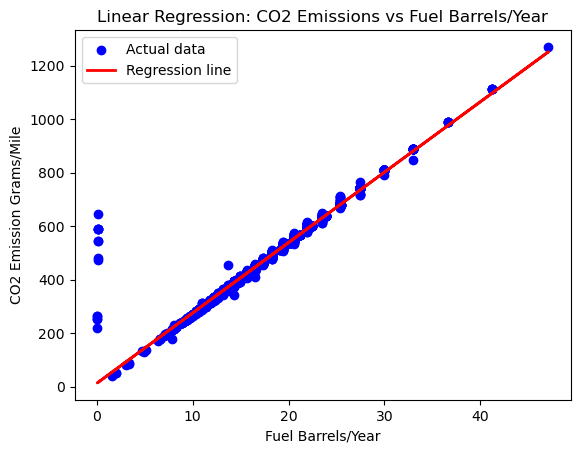

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# Predicted values for the test set
y_pred = lm.predict(X_test)

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')
plt.title('Linear Regression: CO2 Emissions vs Fuel Barrels/Year')
plt.legend()

plt.show()

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [22]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [23]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*